0.669830641521
0.747963207455
0.753938022381
0.74536011069
0.795979229161
0.742778742627
0.753804315616
0.740623742906
0.617502955098
0.73932634552
0.753670461951
0.738305439813
0.625215671884
0.737530554582
0.753536461985
0.737891516769
0.744708302883
0.737658559362
0.753402316325
0.737607713477
0.634596128884
0.735915662132
0.753268025577
0.736529946365
0.754226194569
0.735852094839
0.753133590352
0.736485999849
0.621016838379
0.733526854551
0.752999011264
0.73502312656
0.722918426198
0.733599924932
0.752882122496
0.735196576309
0.676492542117
0.731357087185
0.752769808459
0.734584685131
0.769241646184
0.730411690439
0.752657389311
0.734119048158
0.617682294004
0.729645688095
0.75254486551
0.733549778961
0.643435307807
0.72861573339
0.752434150447
0.732999313481
0.759643486663
0.727071067775
0.75232333424
0.732466919791
0.618207115979
0.726326409547
0.752212417344
0.732028246817
0.662474760813
0.72495320471
0.752101400216
0.730526545083
0.749902247683
0.724344926745
0.751990283314
0.

0.668042859524
0.70680587776
0.74067679736
0.706510230268
0.726764310961
0.70112423894
0.740616613517
0.708804723335
0.627492955975
0.706712032356
0.740556420894
0.7061457315
0.707693314282
0.701040651436
0.740496219712
0.708691925655
0.692176511139
0.706621164188
0.740436010193
0.70603667286
0.701987561785
0.700957522963
0.74037579256
0.708580183545
0.688259162164
0.706530869461
0.740315567033
0.705928976751
0.731666365016
0.700875702507
0.740255333837
0.708495090208
0.627464507975
0.706441915897
0.740195093191
0.706196504229
0.709213268253
0.700981084236
0.740134845319
0.708525150048
0.668842488554
0.706449660382
0.740074590443
0.705879729157
0.7384519856
0.700840678193
0.740014328787
0.708441375623
0.619939723023
0.706395580056
0.73995406058
0.705799073901
0.686839420509
0.700763343389
0.73989380692
0.708358531594
0.722013900681
0.706311260531
0.739833547272
0.705720467316
0.644025597124
0.700699555301
0.739773281743
0.708278004694
0.733541415417
0.70624046009
0.739713010551
0.70598

0.736216049712
0.705894500441
0.707857168676
0.704898560932
0.736188484348
0.703406427985
0.689285927666
0.699525422836
0.73618705989
0.705853832582
0.731196557485
0.704884914519
0.736159510242
0.703366865283
0.634350181984
0.699513850585
0.73613197019
0.705812867674
0.74391954125
0.704871587556
0.736104439864
0.703327748184
0.618651843429
0.699502558495
0.736083077755
0.705772349751
0.653360992957
0.704858574997
0.736055566192
0.703288860772
0.740215584968
0.699491539919
0.736034221128
0.705732067659
0.62036343311
0.704845869847
0.736006728643
0.703250248158
0.697683129341
0.69948078938
0.735985400914
0.705692058088
0.706145917832
0.704833466231
0.735957927829
0.703212555038
0.683934381348
0.699470301034
0.735936618242
0.705652974845
0.719754785424
0.704821357922
0.73590920658
0.703174844782
0.639615467275
0.699460069321
0.735887956109
0.705613880229
0.730529295506
0.704809538956
0.735860564458
0.703137922641
0.624171050821
0.699450088714
0.735839332173
0.705575580175
0.707468124197
0

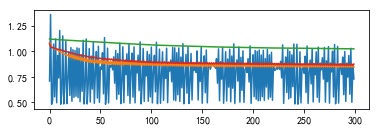

In [144]:
%matplotlib inline
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from numpy import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
mem = Memory("./mycache")
def sigmoid(x):
    return 1.0/(1+exp(-x))


def Gw_NAG(w,x,y,vw,alpha,r):
    G=[0 for i in range(123)]
    g=[0 for i in range(123)]
    sumG=0
    x_temp=x*w
    dw=-((y-log(sigmoid(x*(w-(r*vw).T)))).T*x).T
    vw=(r*vw).T+alpha*dw
    w=w-vw
    return w


def Gw_RMSProp(w,x,y,vw,alpha,r):
    G=[0 for i in range(123)]
    g=[0 for i in range(123)]
    sumG=0
    l=0
    x_temp=x*w
    dw=-(((y-log(sigmoid(x_temp)))).T*x).T
    vw=r*vw+(1-r)*np.multiply(dw,dw)
    w=w-np.multiply(alpha/(sqrt(vw+(1e-8))),dw)
    return w


def Gw_AdaDelta(w,x,y,vw,r,tw):
    G=[0 for i in range(123)]
    g=[0 for i in range(123)]
    sumG=0
    l=0
    x_temp=x*w
    dw=-(((y-log(sigmoid(x_temp)))).T*x).T
    vw=r*vw+(1-r)*np.multiply(dw,dw)
    Dw=np.multiply(-(sqrt(tw+(1e-8))/sqrt(vw+(1e-8))),dw)
    w=w+Dw
    tw=r*tw+np.multiply((1-r)*Dw,Dw)
    return w



def Gw_Adam(w,x,y,size,b,vw,alpha,C,r,mw,i):
    G=[0 for i in range(123)]
    g=[0 for i in range(123)]
    beta=0.9
    sumG=0
    l=0
    x_temp=x*w
    dw=-(((y-log(sigmoid(x_temp)))).T*x).T
    mw=beta*mw+(1-beta)*dw
    vw=r*vw+(1-r)*multiply(dw,dw)
    w=w-(alpha*(sqrt(1-r**(i+1)))/(1-beta**(i+1)))*(mw)/(sqrt(vw+(1e-8)))
    return w




def validation(w,x,y,size):
    L=[0 for i in range(size)]
    l=0
    x_temp=x*w
    for i in range (size):
        l=l-((np.mat(y[i,0]).T*sigmoid(x_temp[i,0])+(1-y[i,0]*sigmoid(1-x_temp[i,0]))))
    return -l[0,0]/size


@mem.cache
def get_data(a):
    data = load_svmlight_file(a,n_features=123)
    return data[0], data[1]

X_train, Y_train = get_data("G:\\Users\\qqqqqq1997520\\Desktop\\a9a.txt")
X_vali,Y_vali=get_data("G:\\Users\\qqqqqq1997520\\Desktop\\a9a_t.txt")
Xtrain=X_train.todense()
Xvali=X_vali.todense()
Xtrain=np.transpose(Xtrain)
Xtrain=Xtrain.T
Ytrain=np.mat(Y_train).T
Yvali=np.mat(Y_train).T
Xtrain=np.column_stack((Xtrain,ones(32561)))
Xvali=np.column_stack((Xvali,ones(16281)))

w_NAG=[0 for i in range(124)]
w_NAG=np.mat(w_NAG).T
w_RMSProp=w_NAG
w_AdaDelta=w_NAG
w_Adam=w_NAG

mw=[0 for i in range(124)]
mw=np.mat(mw).T
mb=0

sumT=0
C=0.1
alpha_NAG=0.002
alpha_RMSProp=0.001
alpha_Adam=0.02

r=0.9
vw_NAG=[0 for i in range(124)]
vw_NAG=np.mat(w_NAG).T
vw_RMSProp=vw_NAG
vw_AdaDelta=vw_NAG
vw_Adam=vw_NAG


tw=[0 for i in range(124)]
tw=np.mat(tw).T

LV_NAG=[0 for i in range(300)]
LV_RMSProp=[0 for i in range(300)]
LV_AdaDelta=[0 for i in range(300)]
LV_Adam=[0 for i in range(300)]


x_train=[[0 for j in range (0,124)] for i in range(640)]
y_train=[[0 for j in range (1)] for i in range(640)]
x_train=np.mat(x_train)
y_train=np.mat(y_train)
for i in range(300):
    for j in range(640):
        a=random.randint(0,32560)
        x_train[j]=Xtrain[a];
        y_train[j,0]=Ytrain[a];
    w_NAG=Gw_NAG(w_NAG,x_train,y_train,vw_NAG,alpha_NAG,r)
    w_RMSProp=Gw_RMSProp(w_RMSProp,Xtrain,Ytrain,vw_RMSProp,alpha_RMSProp,0.995)
    w_AdaDelta=Gw_AdaDelta(w_AdaDelta,Xtrain,Ytrain,vw_AdaDelta,0.995,tw)
    w_Adam=Gw_Adam(w_Adam,Xtrain,Ytrain,640,b_Adam,vw_Adam,alpha_Adam,C,0.995,mw,i)
    LV_NAG[i]=validation(w_NAG,Xvali,Yvali,16281)
    LV_RMSProp[i]=validation(w_RMSProp,Xvali,Yvali,16281)
    LV_AdaDelta[i]=validation(w_AdaDelta,Xvali,Yvali,16281)
    LV_Adam[i]=validation(w_Adam,Xvali,Yvali,16281)

x=[i for i in range(300)]
plt.figure(1)
plt.subplot(211)
plt.plot(x,LV_NAG)
plt.plot(x,LV_RMSProp)
plt.plot(x,LV_AdaDelta)
plt.plot(x,LV_Adam)